# Надгледувано учење

### Дабеска Мила 193263

&nbsp;

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

&nbsp;

## Load the Letter Recognition Dataset

In [2]:
dataset = pd.read_csv('letter-recognition.csv')
dataset

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Check Null values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### Splittng the data

In [4]:
X = dataset.values[:, 1:]
Y = dataset.values[:, 0]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

&nbsp;

## Visualizations

### Whole data histograms

<IPython.core.display.Javascript object>


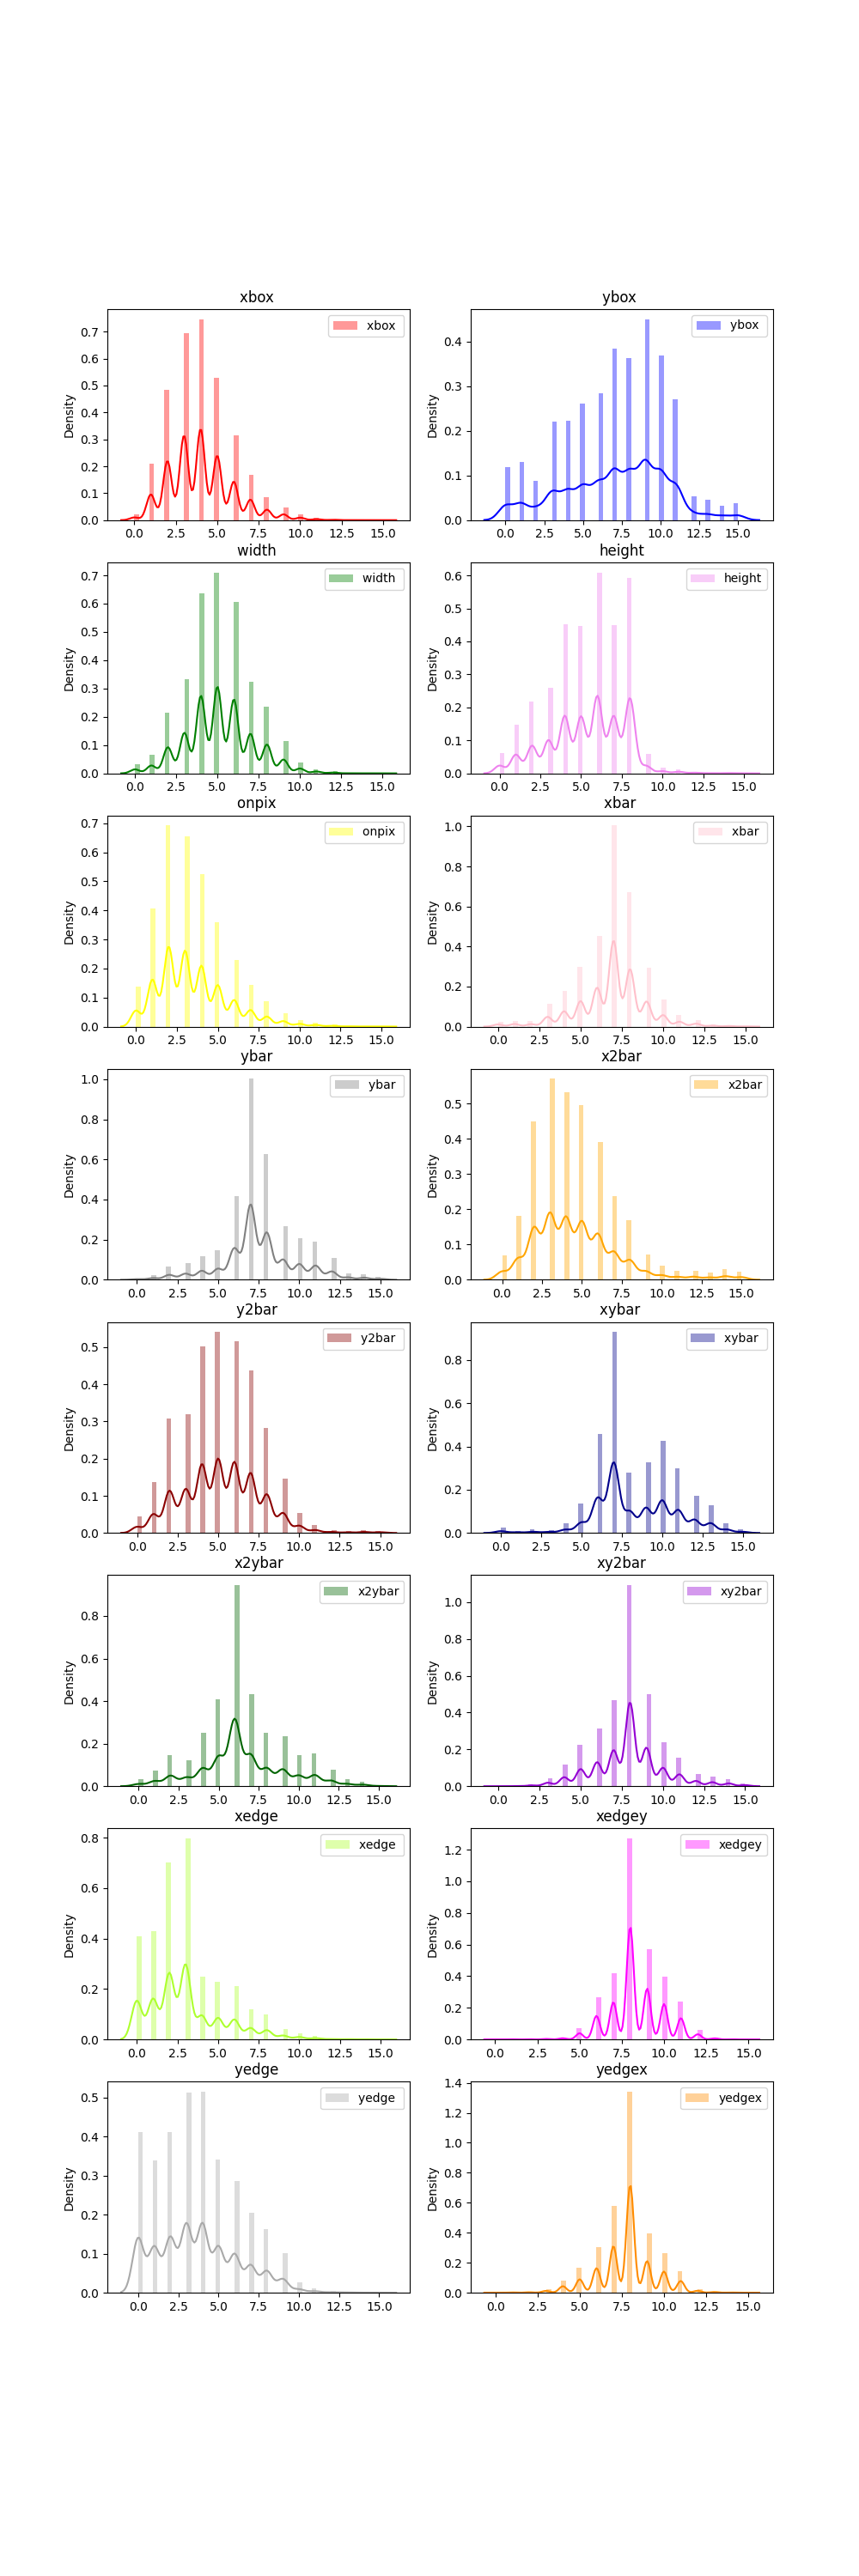

In [6]:
feature_names = dataset.columns.tolist()[1:]
number_of_features = len(feature_names)

feature_colors = ['red', 'blue', 'green', 'violet', 'yellow', 'pink', 'gray', 'orange', \
                   'darkred', 'darkblue', 'darkgreen', 'darkviolet', 'greenyellow', 'magenta', 'darkgray', 'darkorange']


fig = plt.figure(figsize=(10, 30))
fig.subplots(nrows=8, ncols=2)
for feat_i in range(number_of_features): 
    ax = plt.subplot(8,2, feat_i+1)
    plt.title(feature_names[feat_i])
    column = list(X[:, feat_i])
    sns.distplot(column, label=feature_names[feat_i], color=feature_colors[feat_i]) 
    plt.legend()
plt.show()

### Correlation Matrix

<IPython.core.display.Javascript object>


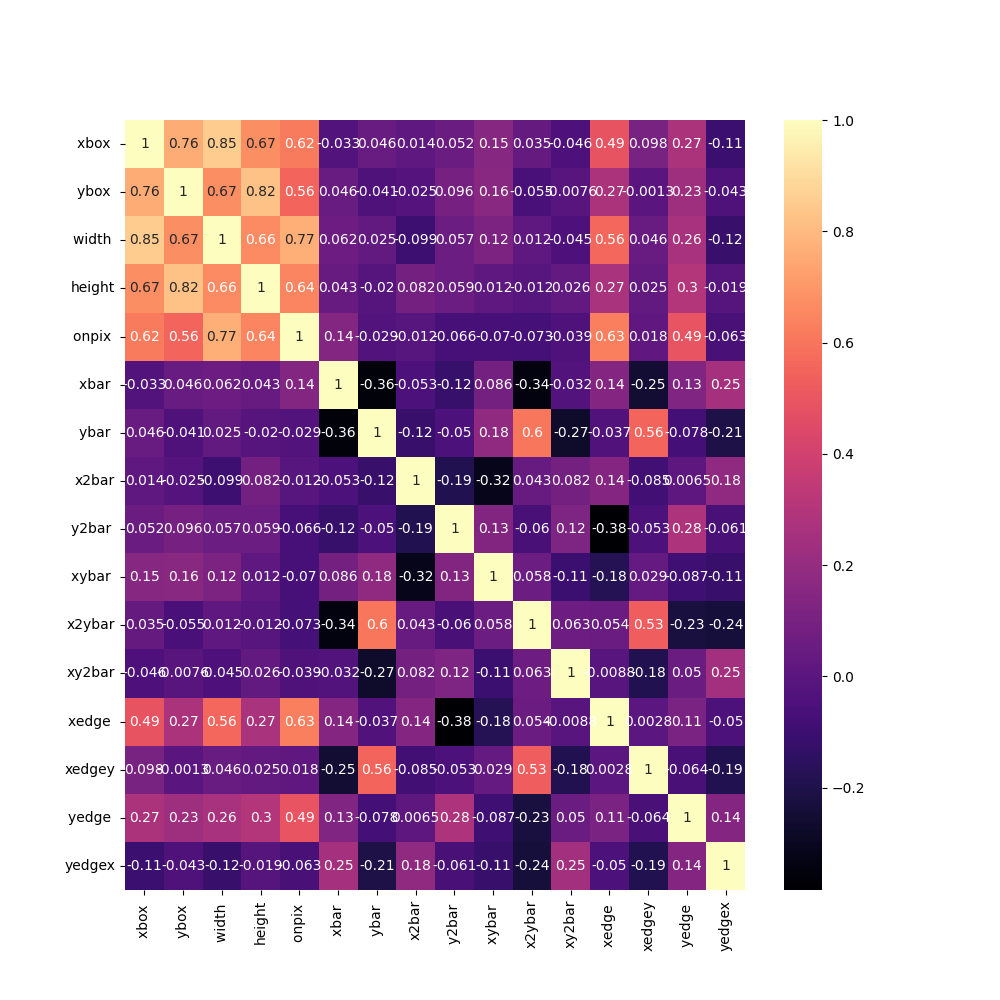

In [7]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): 
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
fig = plt.figure(figsize = (10, 10))
cormat = dataset.corr()
sns.heatmap(cormat, cmap='magma', annot=True)
# plt.imshow(correlation_matrix, cmap = "magma") 
plt.show()

&nbsp;

&nbsp;

## Feature selection and extraction

In [8]:
drop_list1 = ['ybox ','width ']
list = ['letter']
x = dataset.drop(list,axis = 1 )
X_1 = x.drop(drop_list1,axis = 1 )        
X_1.head()

,xbox,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,1,8,6,6,6,6,5,9,1,7,5,10


In [9]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, Y, test_size=0.3)

### Random Forest

In [10]:
rf = RandomForestClassifier()      
rf = rf.fit(X_1_train,y_1_train)
accuracy = accuracy_score(y_1_test, rf.predict(X_1_test))
print('Random Forest accuracy: ', accuracy)

Random Forest accuracy:  0.9598333333333333


### Recursive Feature Elimination(RFE)

In [11]:
feature_names = dataset.columns[1:]
rf_2 = RandomForestClassifier()      
rfe = RFE(estimator=rf_2, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)
print('Chosen best 5 feature by Recursive Feature Elimination(RFE):\n', feature_names[rfe.support_])

Chosen best 5 feature by Recursive Feature Elimination(RFE):
 Index(['ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')


&nbsp;

## Classification models

### Naive Bayes

In [12]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes precision:", precision_score(y_test, y_pred, average='weighted'))
print("Naive Bayes recall:", recall_score(y_test, y_pred, average='weighted'))

Naive Bayes accuracy: 0.6405
Naive Bayes precision: 0.6543380670261464
Naive Bayes recall: 0.6405


### KNN

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN accuracy:", accuracy_score(y_test, y_pred))
print("KNN precision:", precision_score(y_test, y_pred, average='weighted'))
print("KNN recall:", recall_score(y_test, y_pred, average='weighted'))

KNN accuracy: 0.9496666666666667
KNN precision: 0.9508380126119349
KNN recall: 0.9496666666666667


### Logistic Regression

In [14]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression precision:", precision_score(y_test, y_pred, average='weighted'))
print("Logistic Regression recall:", recall_score(y_test, y_pred, average='weighted'))

Logistic Regression accuracy: 0.7568333333333334
Logistic Regression precision: 0.7582609410675903
Logistic Regression recall: 0.7568333333333334


### Support Vector Machine

In [15]:
linear_model = SVC(kernel = 'rbf')
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
print("Support-vector machine with rbf kernel accuracy:", accuracy_score(y_test, y_pred))
print("Support-vector machine with rbf kernel precision:", precision_score(y_test, y_pred, average='weighted'))
print("Support-vector machine with rbf kernel recall:", recall_score(y_test, y_pred, average='weighted'))

Support-vector machine with rbf kernel accuracy: 0.9206666666666666
Support-vector machine with rbf kernel precision: 0.9244190656741713
Support-vector machine with rbf kernel recall: 0.9206666666666666


### Neural network

In [16]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Neural network accuracy:", accuracy_score(y_test, y_pred))
print("Neural network precision:", precision_score(y_test, y_pred, average='weighted'))
print("Neural network recall:", recall_score(y_test, y_pred, average='weighted'))

Neural network accuracy: 0.9218333333333333
Neural network precision: 0.9231829353460739
Neural network recall: 0.9218333333333333


&nbsp;